# Klimadaten auswerten 

In diesem Jupyter Notebook werden wir die Klimadaten der NASA aus und lernen die wichtigsten Python hierfür kennen, die Sie auch für das Messtechnik-Praktikum benötigen um Ihre Versuche auszuwerten.

Zunächst werden die für dieses Jupyter Notebook benötigten Libraries geladen:

In [109]:
#Benötigte Libraries:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

# MatplotLib Settings:
plt.style.use('default') # Matplotlib Style wählen
plt.rcParams['font.size'] = 10; # Schriftgröße

## .csv-Datei als *DataFrame* einlesen

Im Folgenden Nutzen wir globale Klimadaten, die auf der Webseite der NASA zu finden sind: https://data.giss.nasa.gov/gistemp/. Hierbei handelt es sich um Temperaturdaten, die Anomalien gegenüber dem Mittelwert in den Jahren 1951-1980 aufweisen.
Es werden Daten von Dateien (online oder offline) eingelesen mit der Python Bilbiothek `pandas`. Die Daten werden in sogenannten *DataFrames* hier mit dem Namen `global_mean` abgespeichert. 

In [110]:
link = "https://data.giss.nasa.gov/gistemp/graphs_v4/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.csv"
#link = 'data/graph.csv'
global_mean = pd.read_csv(link, header = 1) #DataFrame erstellen

Wir geben das *DataFrame* aus um uns die Messdaten einmal anzusehen: 

In [111]:
global_mean.head(10) # Ausgabe der ersten 5 Spalten
#global_mean.tail(5) # Ausgabe der letzten 5 Spalten
#global_mean # Ausgabe des DataFrames 

,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.17,-0.20
4,1884,-0.28,-0.24
5,1885,-0.33,-0.26
6,1886,-0.31,-0.27
7,1887,-0.36,-0.27
8,1888,-0.18,-0.27
9,1889,-0.11,-0.26


In der ersten Spalte befinden sich lediglich die Indizes der Messungen. Die zweite Spalte beinhaltet das Jahr und die dritte Spalte zeigt den gemessenen globalen Temperaturunterschied im Vergleich zur gemittelten Temeratur der Jahre 1951-1980. Die letzte Spalte zeigt die gleichen Messwerte, jedoch gefiltert. 

Einzelne Spalten kann man sich anzeigen lassen, indem den Spaltel-Namen des zugehörigen *DataFrames* nutzt:

In [112]:
global_mean['Year']

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
140    2020
141    2021
142    2022
143    2023
144    2024
Name: Year, Length: 145, dtype: int64

## Statistische Größen

Die Bibliothek `pandas` ist sehr umfangreich und wird viel zur Datenverarbeitung genutzt. Im folgenden dazu einige Beispiele:

### Statistische Größen: Mittelwert, Standardabweichung, Min, Max

Für jede Spalte lassen sich statistische Größen wie z.B. die Anzahl der Einträge pro Spalte, deren Mittelwert, Standardabweichung, Minimal- und Maximalwert bestimmen:

In [113]:
print(global_mean.describe())

#print(global_mean['No_Smoothing'].describe())
#print(global_mean['Lowess(5)'].describe())

              Year  No_Smoothing   Lowess(5)
count   145.000000    145.000000  145.000000
mean   1952.000000      0.072966    0.073931
std      42.001984      0.392561    0.384890
min    1880.000000     -0.490000   -0.420000
25%    1916.000000     -0.200000   -0.230000
50%    1952.000000     -0.030000   -0.040000
75%    1988.000000      0.310000    0.310000
max    2024.000000      1.280000    1.190000


Die mittlere Jahresmitteltemperaturabweichung im Vergleich zu 1951-1980 beträgt in diesem Fall 0,07 Grad Celsius. Der Trend ist also positiv und im Mittel müssen wir mit einer Erwärmung rechnen, auch wenn einige Jahre negative Jahresmitteltemperaturabweichungen aufzeigen. 


## Kälteste Jahre

Die folgenden Jahre weisen die niedrigsten Werte der Temperatur-Anomalie auf.  
Sie repräsentieren die **kältesten Phasen** in der betrachteten Zeitreihe.
Als erstes wenden wir einen Filter auf die Jahre mit negativer Temperatur-Anomalie an:

In [114]:
cold_years = global_mean[global_mean["No_Smoothing"] < 0] # Filter auf Jahre mit negativer Temperatur-Anomalie

Mit `.sort_values("Spaltenname")` können wir die Tabelle nach dem definierten Spaltennamen sortieren (standardmäßig in **ansteigender** Reihenfolge):

In [115]:
# Sortieren nach kältesten Jahren (kleinste Werte zuerst)
cold_years_sorted = cold_years.sort_values(by="No_Smoothing")

# Ausgabe der Top 10 kältesten Jahre
print(cold_years_sorted.head(10))

    Year  No_Smoothing  Lowess(5)
29  1909         -0.49      -0.42
24  1904         -0.48      -0.32
37  1917         -0.47      -0.31
31  1911         -0.45      -0.40
30  1910         -0.44      -0.42
28  1908         -0.44      -0.40
27  1907         -0.40      -0.38
32  1912         -0.38      -0.36
23  1903         -0.38      -0.29
49  1929         -0.37      -0.20


Und wenn man nur die Jahreszahlen und Werte angezeigt bekommen möchte:

In [116]:
cold_years_sorted[["Year", "No_Smoothing"]].head(10)

,Year,No_Smoothing
29,1909,-0.49
24,1904,-0.48
37,1917,-0.47
31,1911,-0.45
30,1910,-0.44
28,1908,-0.44
27,1907,-0.40
32,1912,-0.38
23,1903,-0.38
49,1929,-0.37


## Wärmste Jahre

Die folgenden Jahre weisen die höchsten Werte der Temperatur-Anomalie auf.  
Sie repräsentieren die **wärmsten Phasen** in der betrachteten Zeitreihe.

In [117]:
# Filter auf Jahre mit positiver Temperatur-Anomalie
warm_years = global_mean[global_mean["No_Smoothing"] > 0]

# Sortieren nach wärmsten Jahren (größte Werte zuerst)
warm_years_sorted = warm_years.sort_values(by="No_Smoothing", ascending=False)

# Ausgabe der Top 10 wärmsten Jahre
print(warm_years_sorted.head(10))

     Year  No_Smoothing  Lowess(5)
144  2024          1.28       1.19
143  2023          1.17       1.13
140  2020          1.01       0.97
136  2016          1.01       0.87
139  2019          0.98       0.94
137  2017          0.92       0.91
135  2015          0.90       0.83
142  2022          0.89       1.08
141  2021          0.85       1.02
138  2018          0.85       0.93


### Wärmstes Jahr

Wenn wir wissen wollen, *wann* diese *maximale Temperaturdifferenz* auftrat, kann auch der zugehörige Index dieses Events gespeichert werden:

In [118]:
index_max = global_mean["No_Smoothing"].idxmax()
print(index_max)

144


Diesen Index können wir nun benutzen, um mittels `.loc` die entsprechenden Einträge zu diesem Index auszugeben:

In [119]:
global_mean.loc[index_max]

Year            2024.00
No_Smoothing       1.28
Lowess(5)          1.19
Name: 144, dtype: float64

## Daten plotten und Diagramm sichern mit 'matplotlib'

Als Beispiel für eine gelungene grafische Darstellung wollen wir die beiden Spalten, *No_Smoothing* and *Lowess(5)* gegenüber der Zeitachse *Year* plotten. Hierfür benützen wir die Python Library `matplotlib`. Einmal geplottet kann das zuletzt angezeigte Diagramm in verschiedenen Formaten mit `plt.savefig('klima_plot1.png')` abgespeichert werden. Wenn nicht anders angegeben, wird die Datei im gleichen Ordner angelegt. 

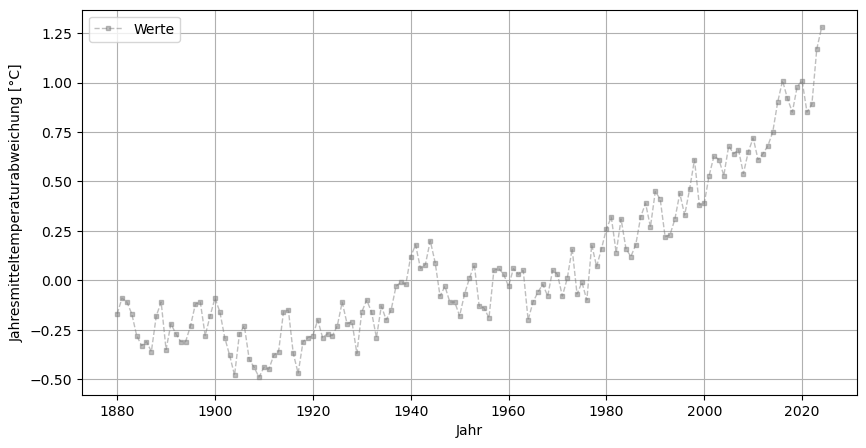

In [120]:
import matplotlib.pyplot as plt
#plt.style.use('default')
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10; # Schriftgröße
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="--", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
#plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();
plt.savefig('klima_plot1.png')
plt.savefig('klima_plot1.pdf')

## Daten glätten

Die von der NASA verwendete Glättung ist die **LO**cally **WE**ighted **S**catter-plot **S**moother (LOWESS). Dabei wird in einem lokal zu definierenden Bereich eine lineare Regression durchgeführt. Eine genauere Erklärung zur Methode findet ihr auf [Youtube](https://youtu.be/b7oryuMP3r8).

Es gibt natürlich viele Methoden und Filter, um Daten zu glätten. Wir wollen nun versuchen, die Methode der NASA zu rekonstruieren. Hierfür benutzen wir die Python Library `statsmodels` und erstellen eine weitere Spalte `Lowess(own)` in unserem DataFrame `global_mean`. In diese Spalte schreiben wir die geglätteten Werte von den Rohdaten `global_mean["No_Smoothing"]` indem wir die Funktion `lowess` aufrufen. Details zu Nutzung der Funktion findet ihr [https://www.statsmodels.org](https://www.statsmodels.org/devel/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html):
- an erster Stelle in der Funktion werden die Y-Werte eingegeben, hier `global_mean["No_Smoothing"]`
- an zweiter Stelle in der Funktion werden die X-Werte eingegeben, hier `global_mean["Year"]`
- die Option `frac` ist eine Zahl zwischen 0 und 1. Dies ist der Anteil der Daten, der bei der Schätzung der einzelnen y-Werte verwendet wird. 
- Ausgegeben wird zweidimensionalas Array. Die erste Spalte enthält die sortierten x-Werte und die zweite Spalte die zugehörigen geschätzten y-Werte. Um die zweite Spalte in den DataFrame zu speichern, wählen wir diese mit `[:,1]` aus.

In [121]:
from statsmodels.nonparametric.smoothers_lowess import lowess

global_mean["Lowess(eigene)"] = lowess(global_mean["No_Smoothing"],global_mean["Year"], frac=1/14)[:,1]

In [122]:
global_mean

,Year,No_Smoothing,Lowess(5),Lowess(eigene)
0,1880,-0.17,-0.10,-0.096166
1,1881,-0.09,-0.13,-0.131758
2,1882,-0.11,-0.17,-0.167628
3,1883,-0.17,-0.20,-0.202299
4,1884,-0.28,-0.24,-0.236649
...,...,...,...,...
140,2020,1.01,0.97,0.965670
141,2021,0.85,1.02,1.023666
142,2022,0.89,1.08,1.078238
143,2023,1.17,1.13,1.133268


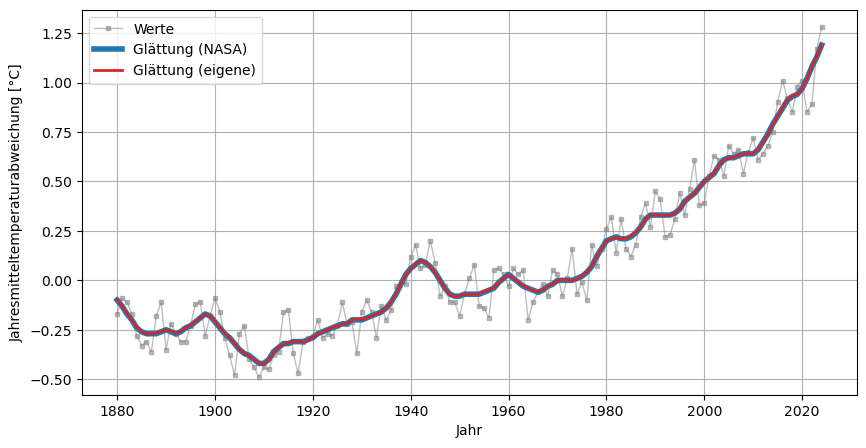

In [123]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.plot(global_mean["Year"],global_mean["No_Smoothing"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.plot(global_mean["Year"],global_mean["Lowess(eigene)"], lw=2,ls='-' ,  color="tab:red", label="Glättung (eigene)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();
plt.savefig('klima_plot2.png')
plt.savefig('klima_plot2.pdf')

## Messunsicherheiten als Fehlerbalken hinzufügen

Bei diesem Datenset stehen uns leider keine Messunsicherheiten zur Verfügung. Um Sie jedoch als Fehlerbalken miteinzubeziehen, wollen wir im Folgenden annehmen, dass der Temperaturunterschied auf 0.25K genau messen werden konnte und fügen die unserem Datensatz hinzu:

In [124]:
global_mean["uncertainty"] = 0.25
print(global_mean)

     Year  No_Smoothing  Lowess(5)  Lowess(eigene)  uncertainty
0    1880         -0.17      -0.10       -0.096166         0.25
1    1881         -0.09      -0.13       -0.131758         0.25
2    1882         -0.11      -0.17       -0.167628         0.25
3    1883         -0.17      -0.20       -0.202299         0.25
4    1884         -0.28      -0.24       -0.236649         0.25
..    ...           ...        ...             ...          ...
140  2020          1.01       0.97        0.965670         0.25
141  2021          0.85       1.02        1.023666         0.25
142  2022          0.89       1.08        1.078238         0.25
143  2023          1.17       1.13        1.133268         0.25
144  2024          1.28       1.19        1.191802         0.25

[145 rows x 5 columns]


Grafisch darstellen tun wir Messunsicherheiten mittels Fehlerbalken und der Matplotlib-Funktion `plt.errorbar`. 

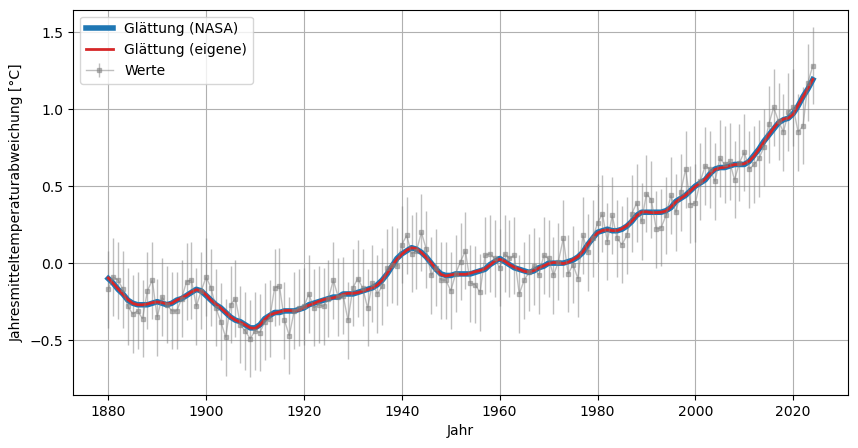

In [125]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(global_mean["Year"],global_mean["Lowess(5)"], lw=4,  color="tab:blue", label="Glättung (NASA)");
plt.plot(global_mean["Year"],global_mean["Lowess(eigene)"], lw=2,ls='-' ,  color="tab:red", label="Glättung (eigene)");
plt.xlabel('Jahr')
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend();
plt.grid();
plt.savefig('klima_plot3.png')
plt.savefig('klima_plot3.pdf')

## Modellfunktionen an Daten anpassen

### Lineare Regression

Mittels linearer Regression kann der Temperaturanstieg aus den Daten berechnet werden. Hierfür wird die Python Library `numpy` benutzt und die Funktion `polyfit` aufgerufen und in als `model` gespeichert. Diese Funktion benutzt die Least-Square Methode für polynomische Modelle. Weitere Informationen zu der Funktion findet ihr [hier](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). Mit der Option `cov=True` wird die Kovarianz-Matrix berechnet, welche die Unsicherheiten für die Fit-Parameter beinhaltet. 

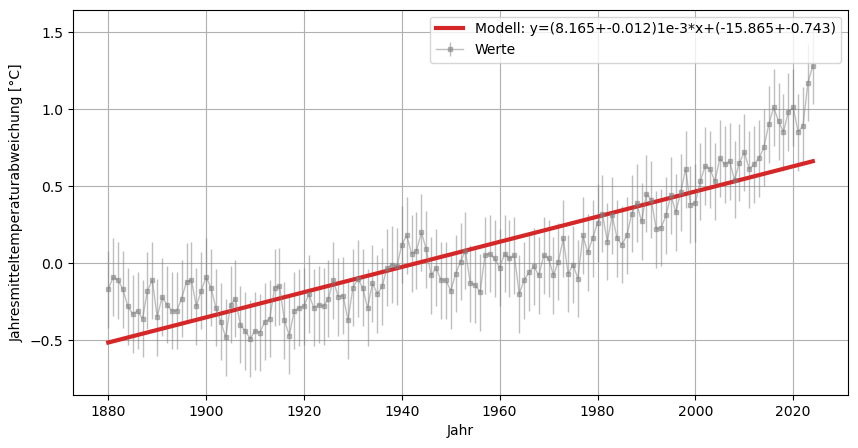

In [126]:
x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]
model_lin1 = np.polyfit(x, y, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model_1 = model_lin1[0][0]*x+model_lin1[0][1] # Modell einer linearen Regression

plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Werte");
plt.plot(x,y_model_1, ls="-", lw=3, color="tab:red", label=f"Modell: y=({model_lin1[0][0]*1000:.3f}+-{np.sqrt(model_lin1[1][0][0]*1000):.3f})1e-3*x+({model_lin1[0][1]:.3f}+-{np.sqrt(model_lin1[1][1][1]):.3f})");
plt.legend();
plt.grid();
plt.savefig('klima_plot4.png')
plt.savefig('klima_plot4.pdf')

Das Model beinhaltet zwei Matrizen:

In [127]:
model_lin1

(array([ 8.16509211e-03, -1.58652943e+01]),
 array([[ 1.44641636e-07, -2.82340474e-04],
        [-2.82340474e-04,  5.51382018e-01]]))

Im ersten Array stehen die Fit-Parameter der linearen Ausgleichsgeraden entsprechend der obigen Deklaration: `y_model_1 = model_lin1[0][0]*x+model_lin1[0][1]`.
Im zweiten Array, hier eine 2x2 Matrix, sind die Unsicherheiten in Form von der [Kovarianz-Matrix](1_Fehlerfortpflanzung.ipynb) dargestellt.
Der Temperaturanstieg kann entsprechend ausgegeben werden:

In [128]:
print(f"Temperaturanstieg pro Jahr (von 1981 bis 2020): {model_lin1[0][0]:.3f}°C/Jahr")
print(f"Temperaturanstieg seit Beginn der Messung: {(y_model_1.iloc[-1]-y_model_1.iloc[0]):.3f}°C")

Temperaturanstieg pro Jahr (von 1981 bis 2020): 0.008°C/Jahr
Temperaturanstieg seit Beginn der Messung: 1.176°C


```{warning}
Die lineare Regression bezieht hier den ganzen Zeitraum mit ein! Im folgenden betrachten wir für den Temperaturgradienten nur die Daten von 1980 bis 2020!
```

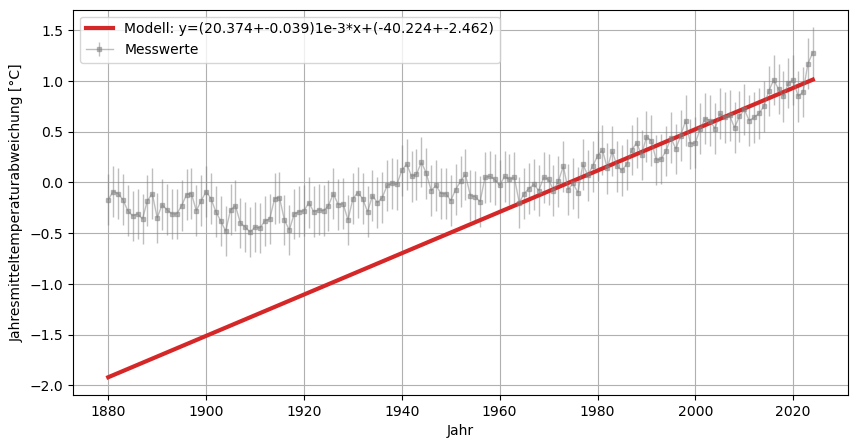

In [129]:
x_1980=global_mean.loc[global_mean["Year"] >= 1980,"Year"]
y_1980=global_mean.loc[global_mean["Year"] >= 1980,"No_Smoothing"]
y_err = global_mean.loc[global_mean["Year"] >= 1980,"uncertainty"]

model_lin2 = np.polyfit(x_1980, y_1980, deg=1, w=1/y_err, cov=True) # 1. Wert = Anstieg , 2. Wert = Schnittpunkt mit y-Achse
y_model_2 = model_lin2[0][0]*x+model_lin2[0][1] # Modell einer linearen Regression

plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Messwerte");
plt.plot(x,y_model_2, ls="-", lw=3, color="tab:red", label=f"Modell: y=({model_lin2[0][0]*1000:.3f}+-{np.sqrt(model_lin2[1][0][0]*1000):.3f})1e-3*x+({model_lin2[0][1]:.3f}+-{np.sqrt(model_lin2[1][1][1]):.3f})");
plt.legend();
plt.grid();
plt.savefig('klima_plot5.png')
plt.savefig('klima_plot5.pdf')

In [130]:
# Temperaturanstieg pro Jahr:
print(f"Temperaturanstieg pro Jahr (von 1980 bis 2020): {model_lin2[0][0]:.3f}°C/Jahr")

# Vorhersage für Jahr 2050
x_val = 2050
y_pred = np.polyval(model_lin2[0], x_val)
print("Vorhersage für 2050:", y_pred)

Temperaturanstieg pro Jahr (von 1980 bis 2020): 0.020°C/Jahr
Vorhersage für 2050: 1.5430715854193977


### Beliebige Funktion fitten

Mit der Polyfit Funktion können in erster Linie Polynome gefittet werden.
Für beliebige Modellierung, wie z.B. Exponential-Funktionen, werden die Funktionen in aller Regel selber definiert. Hierfür eignet sich die scipy-Funktion `curve_fit`. 

In [131]:
from scipy.optimize import curve_fit

Als erstes wird die Funktion deklariert:

In [132]:
def quadratic_fit(x, a, b, c):
    return a*x**2 + b*x + c

Die Funktion wird anschließend an die Daten angepasst:

In [142]:
# Nutze alle Daten über die gesamte Zeit, nicht gefiltert:
x=global_mean["Year"]
y=global_mean["No_Smoothing"]
y_err = global_mean["uncertainty"]

model_quadr = curve_fit(quadratic_fit, x, y)
y_model_quadr = model_quadr[0][0]*x**2 + model_quadr[0][1]*x + model_quadr[0][2]

print(model_quadr)

(array([ 9.43408527e-05, -3.60141597e-01,  3.43436749e+02]), array([[ 4.12615232e-11, -1.61084987e-07,  1.57146658e-04],
       [-1.61084987e-07,  6.28933616e-04, -6.13613427e-01],
       [ 1.57146658e-04, -6.13613427e-01,  5.98721651e+02]]))


Man sieht, je komplexer die Modellfunktion ist, desto schwieriger ist es die Matrizen zu lesen. Daher können die Modelparameter und die Kovarianzmatrix auch separat voneinander gespeichert werden:

In [134]:
popt, pcov = curve_fit(quadratic_fit, x, y)
print('Modellparameter:', popt)
print('Mit der Kovarianz-Matrix und entsprechende Unsicherheiten:', pcov)

print(model_quadr[0][1])

Modellparameter: [ 9.43408527e-05 -3.60141597e-01  3.43436749e+02]
Mit der Kovarianz-Matrix und entsprechende Unsicherheiten: [[ 4.12615232e-11 -1.61084987e-07  1.57146658e-04]
 [-1.61084987e-07  6.28933616e-04 -6.13613427e-01]
 [ 1.57146658e-04 -6.13613427e-01  5.98721651e+02]]
-0.3601415966534972


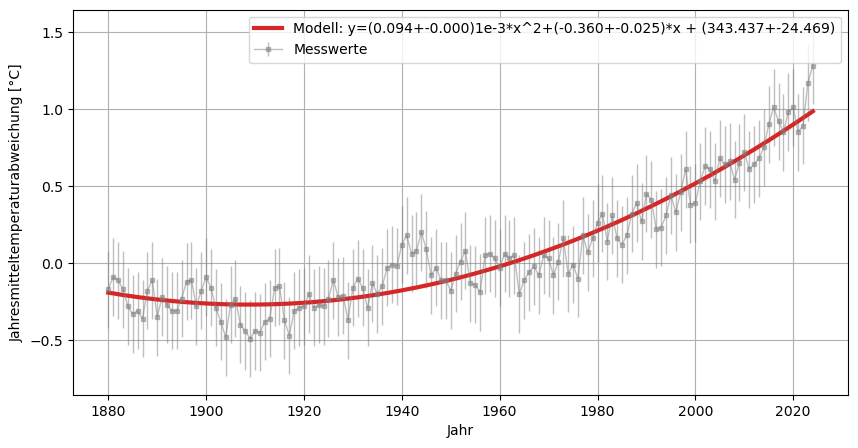

In [135]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.xlabel("Jahr")
plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Messwerte");
plt.plot(x,quadratic_fit(x,*popt), ls="-", lw=3, color="tab:red", label=f"Modell: y=({model_quadr[0][0]*1000:.3f}+-{np.sqrt(model_quadr[1][0][0]*1000):.3f})1e-3*x^2+({model_quadr[0][1]:.3f}+-{np.sqrt(model_quadr[1][1][1]):.3f})*x + ({model_quadr[0][2]:.3f}+-{np.sqrt(model_quadr[1][2][2]):.3f})");
plt.legend();
plt.grid();
plt.savefig('klima_plot6.png')
plt.savefig('klima_plot6.pdf')

a = 0.0422, b = 2.450713, c = -0.3252
Vorhersage für das Jahr x = 2050: 2.3961870762580215



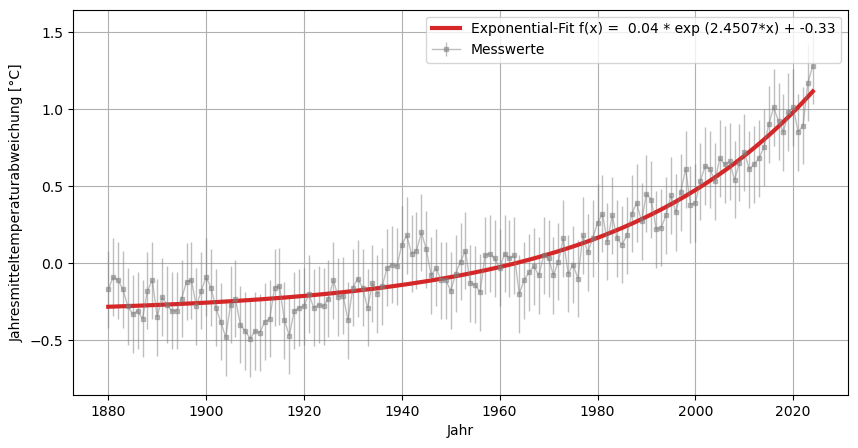

In [136]:
plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10;

# Daten normieren
xdata = (global_mean["Year"].values - 1880) / 100  # auf Jahrhunderte
ydata = global_mean["No_Smoothing"].values

# Modell
def exp_model(x, a, b, c):
    return a * np.exp(b * x) + c

# Startwerte + Bounds
p0 = (1.0, 0.05, -0.5)
bounds = ([-1, 0, -2], [5, 4.0, 2])

# Fit
popt_exp, pcov_exp = curve_fit(exp_model, xdata, ydata, p0=p0, bounds=bounds)
a, b, c = popt_exp

print(f"a = {a:.4f}, b = {b:.6f}, c = {c:.4f}")

# Vorhersage
xline = np.linspace(min(xdata), max(xdata), 200)
yfit = exp_model(xline, *popt_exp)

plt.errorbar(global_mean["Year"],global_mean["No_Smoothing"], yerr=global_mean["uncertainty"], ls="-", lw=1, marker="s", ms=3, color="tab:gray", alpha=0.5, label="Messwerte");
#plt.scatter(xdata*100+1880, ydata, s=10, color="tab:gray", label="Klimadaten")
plt.plot(xline*100+1880, yfit, color="tab:red", lw = 3, label="Exponential-Fit f(x) =  " f"{a:.2f} * exp ({b:.4f}*x) + {c:.2f}")
plt.xlabel("Jahr")
plt.ylabel("Jahresmitteltemperaturabweichung [°C]")
plt.legend()
plt.grid();
plt.savefig('klima_plot8.png')
plt.savefig('klima_plot8.pdf')

print("Vorhersage für das Jahr x = 2050:", exp_model((2050-1880)/100, *popt_exp))
print("")

## Vorhersage für das Jahr 2050

In [137]:
# Vorhersage für Jahr 2050
x_val = 2050

y_pred_lin1 = np.polyval(model_lin1[0], x_val)
print("Lineares Modell 1 (1880-2025):\t", y_pred_lin1)

y_pred_lin2 = np.polyval(model_lin2[0], x_val)
print("Lineares Modell 2 (1981-2025):\t", y_pred_lin2)

y_pred_quadr = np.polyval(model_quadr[0], x_val)
print("Quadratisches Modell:\t\t", y_pred_quadr)

# Exponentielles Modell (x normieren!)
x_val_exp = (x_val - 1880) / 100
y_pred_exp = exp_model(x_val_exp, *popt_exp)
print("Exponentielles Modell:\t\t", y_pred_exp)

Lineares Modell 1 (1880-2025):	 0.8731445441662782
Lineares Modell 2 (1981-2025):	 1.5430715854193977
Quadratisches Modell:		 1.6139089222256189
Exponentielles Modell:		 2.3961870762580215


## Wie gut passen die Modelle?

Die Güte eines Modells oder einer Fit-Funktion lässt sich auf verschiedene Weise beurteilen. Typische Kennwerte sind die **Residuen**, die **Residuensumme** bzw. deren **Standardfehler** sowie der sogenannte **$\chi^2$-Wert**.  
Für die Berechnung des $\chi^2$-Werts werden jedoch die geschätzten Unsicherheiten der Messwerte benötigt – diese sind in der Praxis nicht immer bekannt.

In der Anwendung testet man daher oft mehrere Modelle, passt sie an die Messdaten an und vergleicht anschließend die ausgegebenen Parameter und Gütemaße miteinander. Auf diese Weise lässt sich erkennen, welches Modell die vorhandenen Daten **am besten beschreibt**.  

Wichtig ist jedoch:  
- Auch wenn ein Modell besser passt als andere, bedeutet das nicht automatisch, dass es das **optimale** Modell ist.  
- Ebenso wenig ist damit geklärt, ob das Modell tatsächlich das **richtige** ist, d. h. die zugrunde liegenden physikalischen Zusammenhänge korrekt abbildet.  

Im folgenden Code werden verschiedene Kenngrößen berechnet, um die Anpassung (Fit-Güte) mehrerer Modelle an Messdaten zu beurteilen.

* Die **Residuen** sind die Abweichungen zwischen den gemessenen Werten  $y_i$ und den durch das Modell vorhergesagten Werten $f(x_i)$:

$$
\varepsilon_i = y_i - f(x_i)
$$

* Die **Residuensumme** (Sum of Squared Residuals, SSR) misst die Gesamtabweichung des Modells von den Daten:

$$
SSR = \sum_{i=1}^N \varepsilon_i^2
$$

* Der **Standardfehler der Residuen** oder Root Mean Square Error (RMSE) normiert die Abweichung auf die Freiheitsgrade:

$$
RMSE = \sqrt{\frac{SSR}{\nu}}
$$

mit den Freiheitsgraden $\nu = N - k$, wobei $k$ die Anzahl der Modellparameter ist. Die Freiheitsgrade geben an, wie viel unabhängige Information nach der Modellanpassung übrigbleibt. 

* Der **Chi-Quadrat-Wert** berücksichtigt zusätzlich die Messunsicherheiten $s_i$ der Daten:

$$
\chi^2 = \sum_{i=1}^N \left( \frac{r_i}{s_i} \right)^2
$$

* Durch Normierung auf die Freiheitsgrade erhält man den **reduzierten Chi-Quadrat-Wert**:

$$
\chi^2_\text{red} = \frac{\chi^2}{\nu}
$$

* Das **Bestimmtheitsmaß $R^2$** gibt an, wie viel der Gesamtvarianz der Daten durch das Modell erklärt wird:

$$
R^2 = 1 - \frac{SSR}{SST}, \qquad SST = \sum_{i=1}^N (y_i - \bar y)^2
$$

* Das **korrigierte Bestimmtheitsmaß $R^2_\text{korr}$** berücksichtigt zusätzlich die Anzahl der Parameter $k$ und bestraft übermäßig komplexe Modelle:

$$
R^2_\text{korr} = 1 - (1 - R^2) \cdot \frac{N - 1}{N - k - 1}
$$

             Modell  Freiheitsgrade   SSR  RMSE   Chi²  Chi²_red    R²  R²_korr
Linear (ges. Reihe)             143 5.255 0.192 84.072     0.588 0.763    0.760
   Linear (ab 1981)              43 0.494 0.107  7.899     0.184 0.865    0.858
        Quadratisch             142 2.086 0.121 33.375     0.235 0.906    0.904
       Exponentiell             142 1.926 0.116 30.813     0.217 0.913    0.911


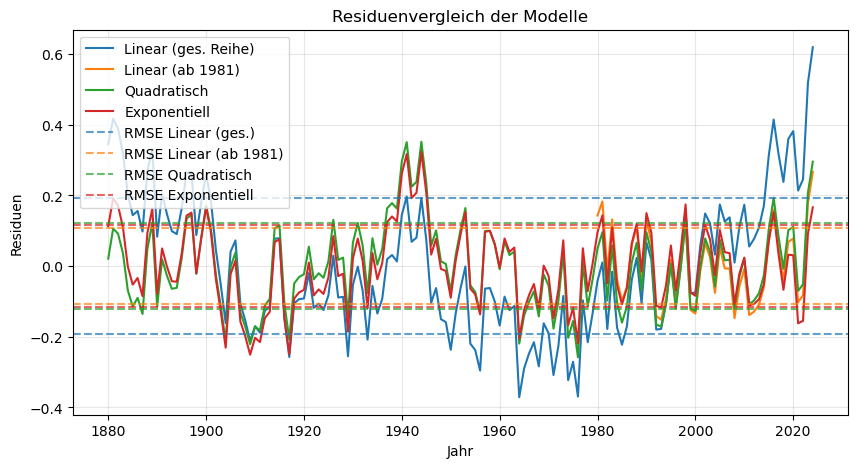

In [150]:
from sklearn.metrics import r2_score
import pandas as pd
import numpy as np

# --- Residuen (Lineare und Quadratische Modelle) ---
residuals_lin1 = y - (model_lin1[0][0]*x + model_lin1[0][1])
residuals_lin2 = y_1980 - (model_lin2[0][0]*x_1980 + model_lin2[0][1])
residuals_quadr = y - quadratic_fit(x,*popt)

# --- Freiheitsgrade ---
dof_lin1 = len(x) - len(model_lin1[0])
dof_lin2 = len(x_1980) - len(model_lin2[0])
dof_quadr = len(x) - len(model_quadr[0])

# --- SSR ---
ssr_lin1 = np.sum(residuals_lin1**2)
ssr_lin2 = np.sum(residuals_lin2**2)
ssr_quadr = np.sum(residuals_quadr**2)

# --- RMSE ---
rmse_lin1 = np.sqrt(ssr_lin1 / dof_lin1)
rmse_lin2 = np.sqrt(ssr_lin2 / dof_lin2)
rmse_quadr = np.sqrt(ssr_quadr / dof_quadr)

# --- Chi² ---
chi2_lin1 = np.sum((residuals_lin1 / y_err) ** 2)  
chi2_lin2 = np.sum((residuals_lin2 / y_err) ** 2)  
chi2_quadr = np.sum((residuals_quadr / y_err) ** 2)  

chi2_red_lin1 = chi2_lin1 / dof_lin1
chi2_red_lin2 = chi2_lin2 / dof_lin2
chi2_red_quadr = chi2_quadr / dof_quadr

# --- R² und Adjusted R² ---
def r2_adj(y_true, y_pred, p):
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    return r2, 1 - (1-r2)*(n-1)/(n-p-1)

r2_lin1, r2adj_lin1 = r2_adj(y, model_lin1[0][0]*x + model_lin1[0][1], 2)
r2_lin2, r2adj_lin2 = r2_adj(y_1980, model_lin2[0][0]*x_1980 + model_lin2[0][1], 2)
r2_quadr, r2adj_quadr = r2_adj(y, quadratic_fit(x,*popt), 3)

# --- Exponentielles Modell ---
y_exp = exp_model(xdata, *popt_exp)
residuals_exp = ydata - y_exp
dof_exp = len(xdata) - len(popt_exp)

ssr_exp = np.sum(residuals_exp**2)
rmse_exp = np.sqrt(ssr_exp / dof_exp)
chi2_exp = np.sum((residuals_exp / global_mean["uncertainty"].values) ** 2)
chi2_red_exp = chi2_exp / dof_exp
r2_exp, r2adj_exp = r2_adj(ydata, y_exp, len(popt_exp))

# --- Ergebnisse in Tabelle ---
results = pd.DataFrame({
    "Modell": ["Linear (ges. Reihe)", "Linear (ab 1981)", "Quadratisch", "Exponentiell"],
    "Freiheitsgrade": [dof_lin1, dof_lin2, dof_quadr, dof_exp],
    "SSR": [ssr_lin1, ssr_lin2, ssr_quadr, ssr_exp],
    "RMSE": [rmse_lin1, rmse_lin2, rmse_quadr, rmse_exp],
    "Chi²": [chi2_lin1, chi2_lin2, chi2_quadr, chi2_exp],
    "Chi²_red": [chi2_red_lin1, chi2_red_lin2, chi2_red_quadr, chi2_red_exp],
    "R²": [r2_lin1, r2_lin2, r2_quadr, r2_exp],
    "R²_korr": [r2adj_lin1, r2adj_lin2, r2adj_quadr, r2adj_exp]
})

print(results.to_string(index=False, float_format="%.3f"))


plt.figure(figsize=(10,5))
plt.rcParams['font.size'] = 10
plt.ylabel("Residuen")
plt.xlabel("Jahr")

# Residuenplots
plt.plot(x, residuals_lin1, label='Linear (ges. Reihe)', color="C0")
plt.plot(x_1980, residuals_lin2, label='Linear (ab 1981)', color="C1")
plt.plot(x, residuals_quadr, label='Quadratisch', color="C2")
plt.plot(global_mean["Year"], residuals_exp, label='Exponentiell', color="C3")

# Standardfehler (RMSE) als horizontale Linien
plt.axhline(rmse_lin1, color='C0', linestyle='--', alpha=0.7, label='RMSE Linear (ges.)')
plt.axhline(-rmse_lin1, color='C0', linestyle='--', alpha=0.7)

plt.axhline(rmse_lin2, color='C1', linestyle='--', alpha=0.7, label='RMSE Linear (ab 1981)')
plt.axhline(-rmse_lin2, color='C1', linestyle='--', alpha=0.7)

plt.axhline(rmse_quadr, color='C2', linestyle='--', alpha=0.7, label='RMSE Quadratisch')
plt.axhline(-rmse_quadr, color='C2', linestyle='--', alpha=0.7)

plt.axhline(rmse_exp, color='C3', linestyle='--', alpha=0.7, label='RMSE Exponentiell')
plt.axhline(-rmse_exp, color='C3', linestyle='--', alpha=0.7)

# Legende, Gitter, Speichern
plt.legend()
plt.grid(alpha=0.3)
plt.title("Residuenvergleich der Modelle")
plt.savefig('klima_residuen.png')
plt.savefig('klima_residuen.pdf')
plt.show()

Vergleicht man die jeweiligen Werte miteinander, so zeigt sich:

* In allen Fällen sind die Residuen gleichmäßig um Null verteilt – alle Modelle liefern also eine gute Approximation.  
* Das zweite lineare Modell (angepasst ab dem Jahresbereich 1981) erzielt gute Ergebnisse, der Standardfehler ist der kleinste im Vergleich zu anderen Modellen. Jedoch muss man hier berücksichtigen, dass weniger Daten benutzt werden als in den anderen Zeitserien und damit Werte verfälscht werden im direkten Vergleich. 
* Betrachtet man den gesamten Jahresbereich, liefern das quadratische und expxonentielle Modell die besten Ergebnisse.

Alle reduzierten $\chi^2$-Werte liegen unter 1. Das deutet darauf hin, dass die angenommenen Fehlerbalken zu groß gewählt worden sind und das Modell *zu gut* passt. Alle Modelle sind akzeptabel, aber unsere geschätzten Unsicherheiten von 0,25 Kelvin dominieren.

## Fehler der Vorhersagen 

In [151]:
import numpy as np

# Jahr für Vorhersage
x_val = 2050
x_exp = (x_val - 1880) / 100  # normiert für exp

# --- LINEAR (ges. Reihe) ---
p_lin1, cov_lin1 = np.polyfit(x, y, 1, cov=True)
y_pred_lin1 = np.polyval(p_lin1, x_val)

# Unsicherheit: Var(f) = J C J^T
J_lin1 = np.array([x_val, 1.0])  # [∂f/∂m, ∂f/∂b] = [x, 1]
var_lin1 = J_lin1 @ cov_lin1 @ J_lin1.T
sigma_lin1 = np.sqrt(var_lin1)

# --- LINEAR (ab 1981) ---
p_lin2, cov_lin2 = np.polyfit(x_1980, y_1980, 1, cov=True)
y_pred_lin2 = np.polyval(p_lin2, x_val)

J_lin2 = np.array([x_val, 1.0])
var_lin2 = J_lin2 @ cov_lin2 @ J_lin2.T
sigma_lin2 = np.sqrt(var_lin2)

# --- QUADRATISCH ---
p_quadr, cov_quadr = np.polyfit(x, y, 2, cov=True)
y_pred_quadr = np.polyval(p_quadr, x_val)

# Ableitungen: f(x) = ax^2 + bx + c
J_quadr = np.array([x_val**2, x_val, 1.0])
var_quadr = J_quadr @ cov_quadr @ J_quadr.T
sigma_quadr = np.sqrt(var_quadr)

# --- EXPONENTIELL ---
# exp_model(x) = a * exp(bx) + c
a, b, c = popt_exp
cov_exp = pcov_exp
y_pred_exp = exp_model(x_exp, *popt_exp)

J_exp = np.array([
    np.exp(b * x_exp),           # ∂f/∂a
    a * x_exp * np.exp(b * x_exp), # ∂f/∂b
    1.0                          # ∂f/∂c
])
var_exp = J_exp @ cov_exp @ J_exp.T
sigma_exp = np.sqrt(var_exp)

# --- Ergebnisse ---
print(f"Vorhersage 2050 Linear (ges. Reihe): {y_pred_lin1:.3f} ± {sigma_lin1:.3f}")
print(f"Vorhersage 2050 Linear (ab 1981):    {y_pred_lin2:.3f} ± {sigma_lin2:.3f}")
print(f"Vorhersage 2050 Quadratisch:         {y_pred_quadr:.3f} ± {sigma_quadr:.3f}")
print(f"Vorhersage 2050 Exponentiell:        {y_pred_exp:.3f} ± {sigma_exp:.3f}")

Vorhersage 2050 Linear (ges. Reihe): 0.873 ± 0.041
Vorhersage 2050 Linear (ab 1981):    1.543 ± 0.061
Vorhersage 2050 Quadratisch:         1.614 ± 0.057
Vorhersage 2050 Exponentiell:        2.396 ± 0.168
